# Bengaluru House Pricing Analysis and Predicition using Linear Regression

## 1.Aims, Objectives and Background
# Introduction

What factors influence a home purchase? Location, size, proximity to amenities, and the quintessential white picket fence—all crucial, but the key consideration is often the price. In the aftermath of demonetization, the impact of the Real Estate Act, and dwindling trust in developers, India saw a 7% drop in housing unit sales in 2017. Bengaluru's property prices fell by nearly 5% in the latter half of 2017, according to Knight Frank.

For potential homeowners, Makaan reports over 9,000 apartments in the ₹42-52 lakh range and 7,100 in the ₹52-62 lakh segment. Additionally, there are over 5,000 projects in the ₹15-25 lakh range and those in the ₹34-43 lakh category.

Buying a home in Bengaluru, amidst its millennial crowd, vibrant culture, favorable climate, and job opportunities, poses unique challenges. Determining housing prices in this Silicon Valley of India is a nuanced task amid these dynamic factors.

# 1.2. Aims and Objectives

Project Objectives:

* Familiarize with the python packages tools.
* Analyze and understand the dataset
* Exploring machining algorithms to make the best prediction 

# 1.3. Dataset

## Data selection

This dataset is downloaded from the kaggle website : https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
# installation of some python packages
import pandas as pd
import numpy as np

# Data visualisation packages
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
data1 = pd.read_csv("Bengaluru_House_Data.csv")
data1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data1.shape
(13320, 9)

(13320, 9)

In [4]:
# Get the columns of the dataset
data1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# Data Preprocessing
Before diving into analysis, it's crucial to undertake a series of pre-processing steps to maximize the effective utilization of the data. My primary emphasis at this stage is on reformatting specific columns, particularly those pertaining to availability, size, total_sqft, and location.

In [5]:
# Check for Null Values
data1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<Axes: >

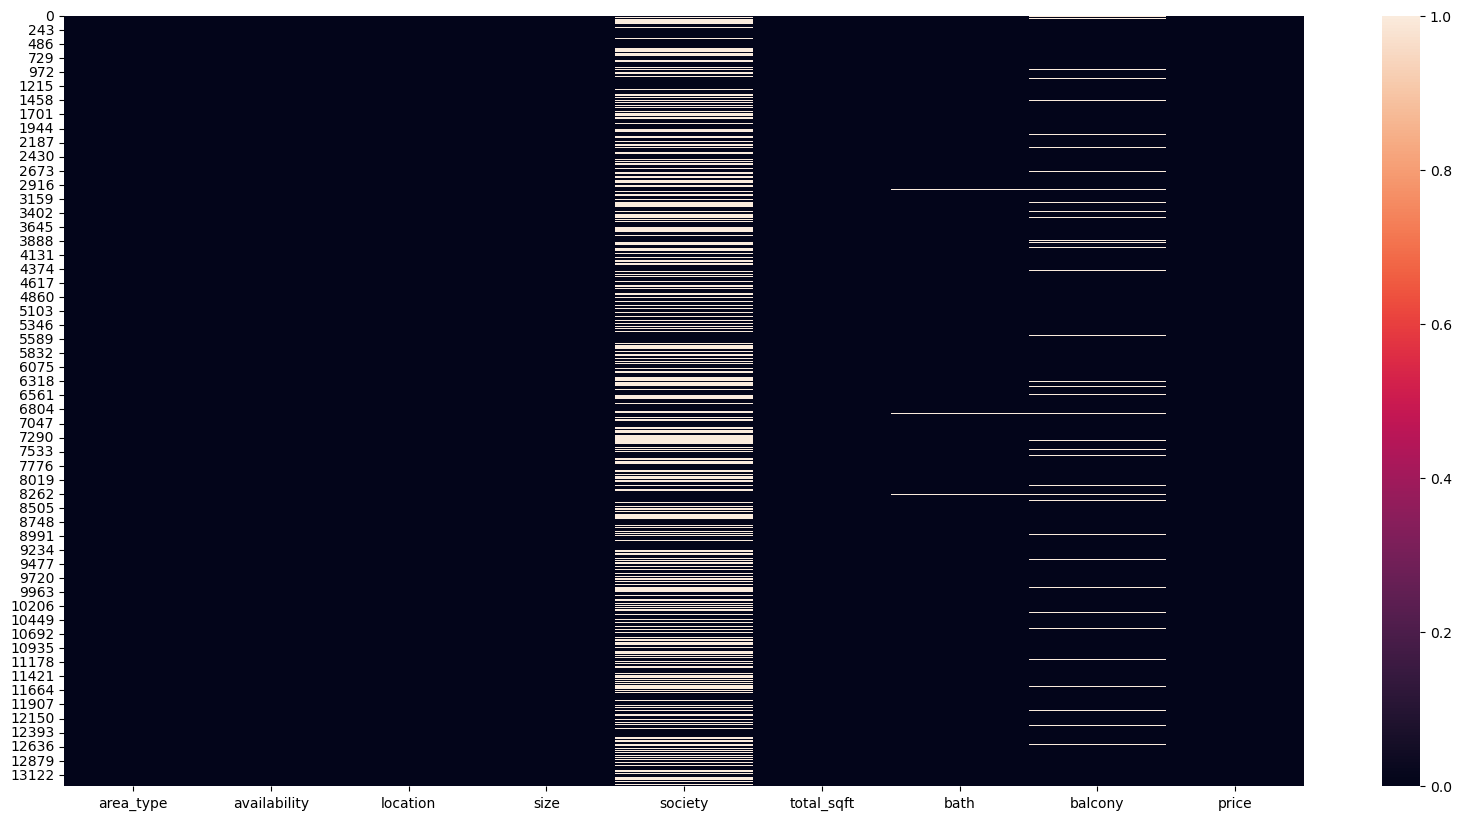

In [6]:
# using heatmap to visualise the Null values
sns.heatmap(data1.isnull())

The "society and balcony" columns are excluded from consideration due to its numerous null values, and its impact on the  rendering it unsuitable for incorporation into the prediction model.

In [7]:
data2 = data1.drop(['society'],axis = 1)
data2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
data2.shape

(13320, 8)

In [9]:
data2.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [10]:
# drop all the null values
data3 = data2.dropna()
data3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [11]:
data3.shape

(12710, 8)

In [12]:
data3.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

Moving forward, a crucial step involves verifying the accuracy of the data types assigned to each column. A thorough examination has revealed discrepancies in the data types, particularly size and total_sqft. In response, we are now initiating the conversion of these count columns to the appropriate integer data type (Feature Engineering)



## Feature Engineering

In [13]:
data4 = data3.copy()

In [14]:
data4.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [15]:
data4['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

Add new feature(integer) for bedroom

In [16]:
data4['bedroom'] = data4['size'].apply(lambda x: int(x.split(' ')[0]))
data4['bedroom'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [17]:
data4.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
bedroom           int64
dtype: object

We now handle the total sq.ft. It seems some values in the total sq.ft are in ranges (e.g. 2100-2850) and others have diiferent measuring units such as sq. Yard, sq. Meter, perch and Acres (34.46Sq. Meter).

In [18]:
# This function is used to show values that are in ranges and those with different measuring units
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
data4[~data4['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Ready To Move,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,18-Mar,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,20-Dec,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [20]:
def convert_to_sqft(x):
    token_y = x.split('Sq. Y')
    if len(token_y) == 2:
        conversion_factor_y = 9.0
        square_feet_y = float(token_y[0]) * conversion_factor_y
        return square_feet_y

    token_m = x.split('Sq. M')
    if len(token_m) == 2:
        conversion_factor_m = 10.7639
        square_feet_m = float(token_m[0]) * conversion_factor_m
        return square_feet_m
   
    token_p = x.split('P')
    if len(token_p)==2:
        conversion_factor_p = 272.25
        square_feet_p = float(token_p[0]) * conversion_factor_p
        return square_feet_p

    token_a = x.split('A')
    if len(token_a)==2:
        conversion_factor_a = 43560.0
        square_feet_a = float(token_a[0]) * conversion_factor_a
        return square_feet_a
    

    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [21]:
New_total_sqft = convert_to_sqft

In [22]:
data4['total_sqft'] = data4['total_sqft'].apply(New_total_sqft)
data4 = data4[data4['total_sqft'].notnull()]
data4.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4


Upon inspecting the data, it appears to be in good order. With the confirmation below,  we are now prepared to move on to additional preprocessing steps to facilitate the exploratory phase.

In [23]:
data4.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
bedroom           int64
dtype: object

In [24]:
data4['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-Feb', '18-Nov', '18-May', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '16-Jul', '15-Jun', '20-Nov', '20-Jul',
       '16-Sep', '20-Feb', '15-Dec', '16-Oct', '22-Nov', '15-Aug',
       '17-Jan', '16-Nov', '20-Apr', '16-Jan', '17-Feb', '14-Jul'],
      dtype=object)

In [25]:
def only_month(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (tokens[1])
    try:
        return x
    except:
        return None

## Months availability statistics
Utilizing the "only_month" function outlined below, we aim to extract information about the availability months of the apartments.

month_data = only_month(X)

In [26]:
month_data = only_month

In [27]:
data4['availability'] = data4['availability'].apply(month_data)
data4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [28]:
data4['availability'].unique()

array(['Dec', 'Ready To Move', 'Feb', 'Nov', 'May', 'Oct', 'Sep', 'Mar',
       'Apr', 'Aug', 'Jun', 'Jan', 'Jul'], dtype=object)

In [29]:
data4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [30]:
# Creating a new column (price per sqft) with will be used for outlier detection
data5 = data4.copy()
data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft']
data5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [31]:
# Getting the statistics for price per sqft
data5_stats = data5['price_per_sqft'].describe()
data5_stats

count    1.270500e+04
mean     6.876995e+03
std      2.261750e+04
min      2.257423e+00
25%      4.237918e+03
50%      5.371901e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

In [32]:
data5.to_csv("bhp.csv",index=False)

Analyze the categorical variable "locations." To streamline the dataset, it is imperative to employ a dimensionality reduction technique to decrease the number of unique locations.

In [33]:
# Arrange the locations in descending order
data5.location = data5.location.apply(lambda x: x.strip())
location_stats = data5['location'].value_counts(ascending=False)
location_stats

Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
whitefiled            1
Medi Agrahara         1
Sadduguntepalya       1
Shirdi Sai Nagar      1
Abshot Layout         1
Name: location, Length: 1253, dtype: int64

In [34]:
# finding the total number of locations
location_stats.values.sum()

12705

In [35]:
# Number of categories in the Location with more than 10 apartment
len(location_stats[location_stats>10])

236

In [36]:
# Number of categories in the Location
len(location_stats)

1253

In [37]:
# Number of categories in the Location with less than or equal to 10 apartment
len(location_stats[location_stats<=10])

1017

### Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [38]:
# Location with less than 10 apartments
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Dairy Circle        10
HAL 2nd Stage       10
Basapura            10
Gunjur Palya        10
Ganga Nagar         10
                    ..
whitefiled           1
Medi Agrahara        1
Sadduguntepalya      1
Shirdi Sai Nagar     1
Abshot Layout        1
Name: location, Length: 1017, dtype: int64

In [39]:
len(data5.location.unique())

1253

In [40]:
# Categorising location less than 10 into a category called other
data5['location'] = data5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data5.location.unique())

237

In [41]:
data5.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Super built-up Area,Feb,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


## Removing outliers Using Business Logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bedroom apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bedroom than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft


In [42]:
data5.describe()

,total_sqft,bath,balcony,price,bedroom,price_per_sqft
count,1.270500e+04,12705.000000,12705.000000,12705.000000,12705.000000,1.270500e+04
mean,1.735402e+03,2.616765,1.584337,106.013340,2.736560,6.876995e+03
std,1.342246e+04,1.224971,0.817198,131.720513,1.203717,2.261750e+04
min,5.000000e+00,1.000000,0.000000,8.000000,1.000000,2.257423e+00
25%,1.100000e+03,2.000000,1.000000,49.020000,2.000000,4.237918e+03
50%,1.260000e+03,2.000000,2.000000,70.000000,3.000000,5.371901e+03
75%,1.642000e+03,3.000000,2.000000,115.000000,3.000000,7.142857e+03
max,1.306800e+06,40.000000,3.000000,2912.000000,43.000000,2.300000e+06


In [43]:
# total sqft per bedroom more than 300
data5[data5['total_sqft']/data5['bedroom']<300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom,price_per_sqft
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Ready To Move,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Ready To Move,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [44]:
data5.shape

(12705, 10)

In [45]:
data6 = data5[~(data5['total_sqft']/data5['bedroom']<300)]
data6.shape

(12047, 10)

### Outlier Removal Using Standard Deviation and Mean

In [46]:
data6['price_per_sqft'].describe()

count     12047.000000
mean       6198.727711
std        3986.350727
min           2.257423
25%        4196.317870
50%        5250.291036
75%        6823.770863
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [47]:
def remove_pps_outliers(data):
    data_out = pd.DataFrame()
    for key, subdata in data.groupby('location'):
        m = np.mean(subdata['price_per_sqft'])
        st = np.std(subdata['price_per_sqft'])
        reduced_data = subdata[(subdata['price_per_sqft']>(m-st)) & (subdata['price_per_sqft']<=(m+st))]
        data_out = pd.concat([data_out,reduced_data],ignore_index=True)
    return data_out
data7 = remove_pps_outliers(data6)
data7.shape

(9875, 10)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

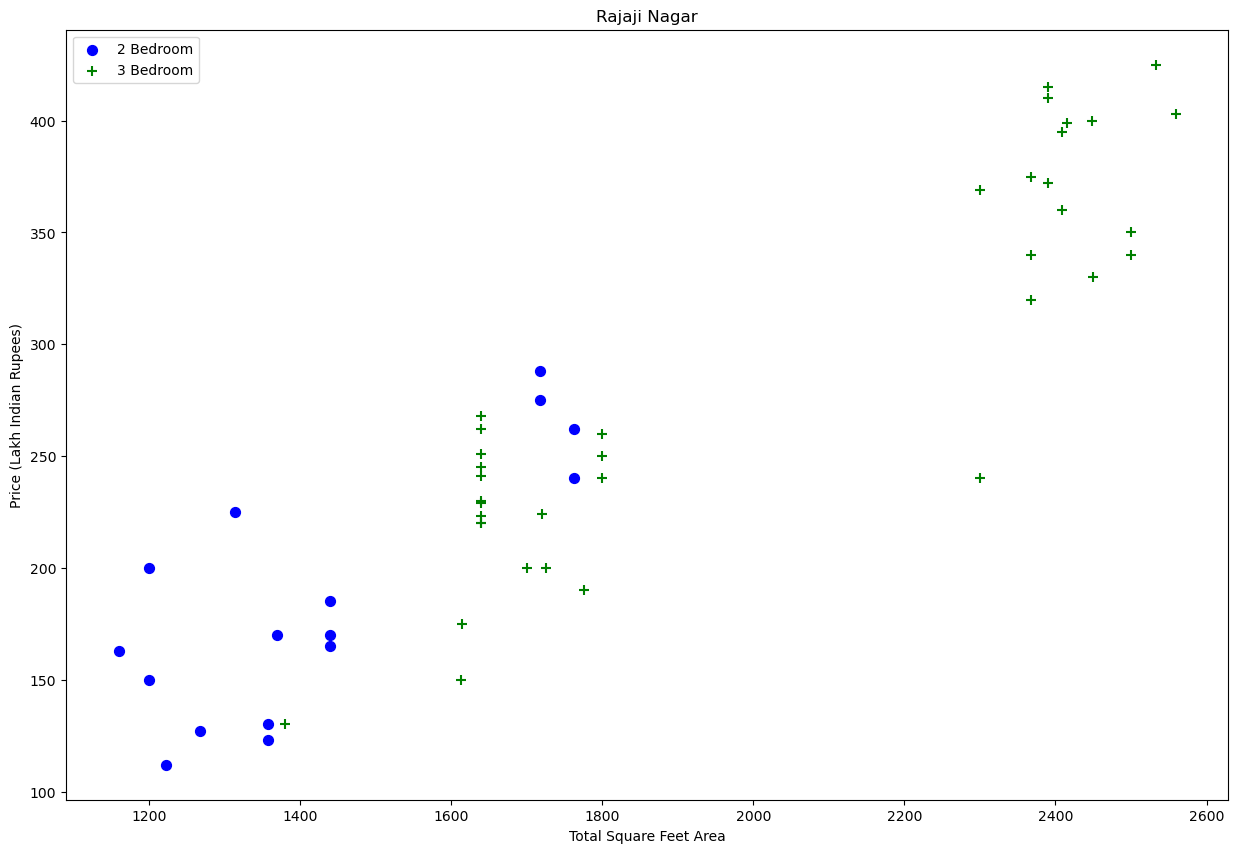

In [48]:
def plot_scatter_chart(data,location):
    bedroom2 = data[(data['location']==location) & (data['bedroom']==2)]
    bedroom3 = data[(data['location']==location) & (data['bedroom']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bedroom2['total_sqft'],bedroom2['price'],color='blue',label='2 Bedroom', s=50)
    plt.scatter(bedroom3['total_sqft'],bedroom3['price'],marker='+', color='green',label='3 Bedroom', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data7,"Rajaji Nagar")

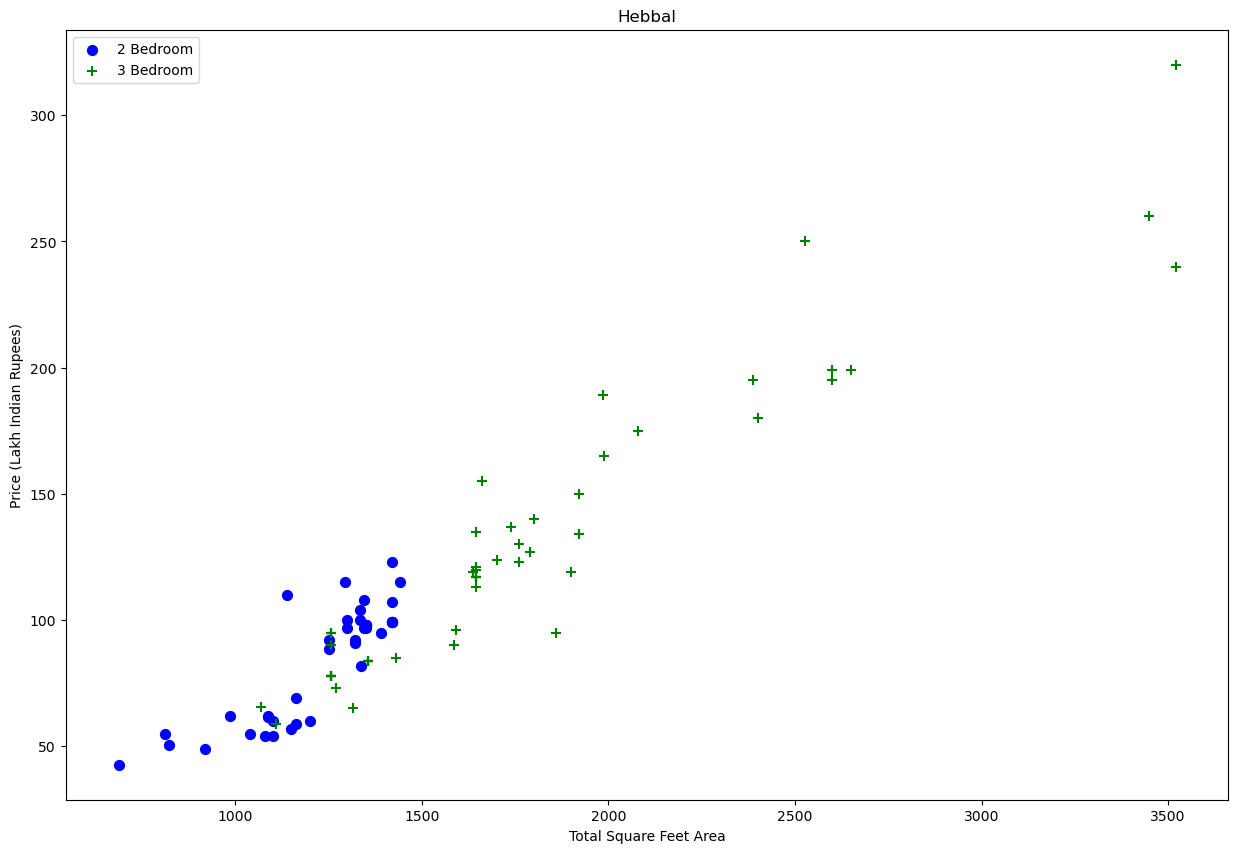

In [49]:
plot_scatter_chart(data7,"Hebbal")

we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [50]:
def remove_bedroom_outliers(data):
    exclude_indices = []
    
    for location, location_data in data.groupby('location'):
        bedroom_stats = {}
        
        for bedroom, bedroom_data in location_data.groupby('bedroom'):
            stats = {
                'mean': np.mean(bedroom_data['price_per_sqft']),
                'std': np.std(bedroom_data['price_per_sqft']),
                'count': bedroom_data.shape[0]
            }
            bedroom_stats[bedroom] = stats
        
        for bedroom, bedroom_data in location_data.groupby('bedroom'):
            stats = bedroom_stats.get(bedroom - 1)
            
            if stats and stats['count'] > 5:
                exclude_indices.extend(bedroom_data[bedroom_data['price_per_sqft'] < stats['mean']].index)
    
    return data.drop(exclude_indices, axis='index')

data8 = remove_bedroom_outliers(data7)
# df9 = data8.copy()  # If you want to keep the original DataFrame
data8.shape

(7031, 10)

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

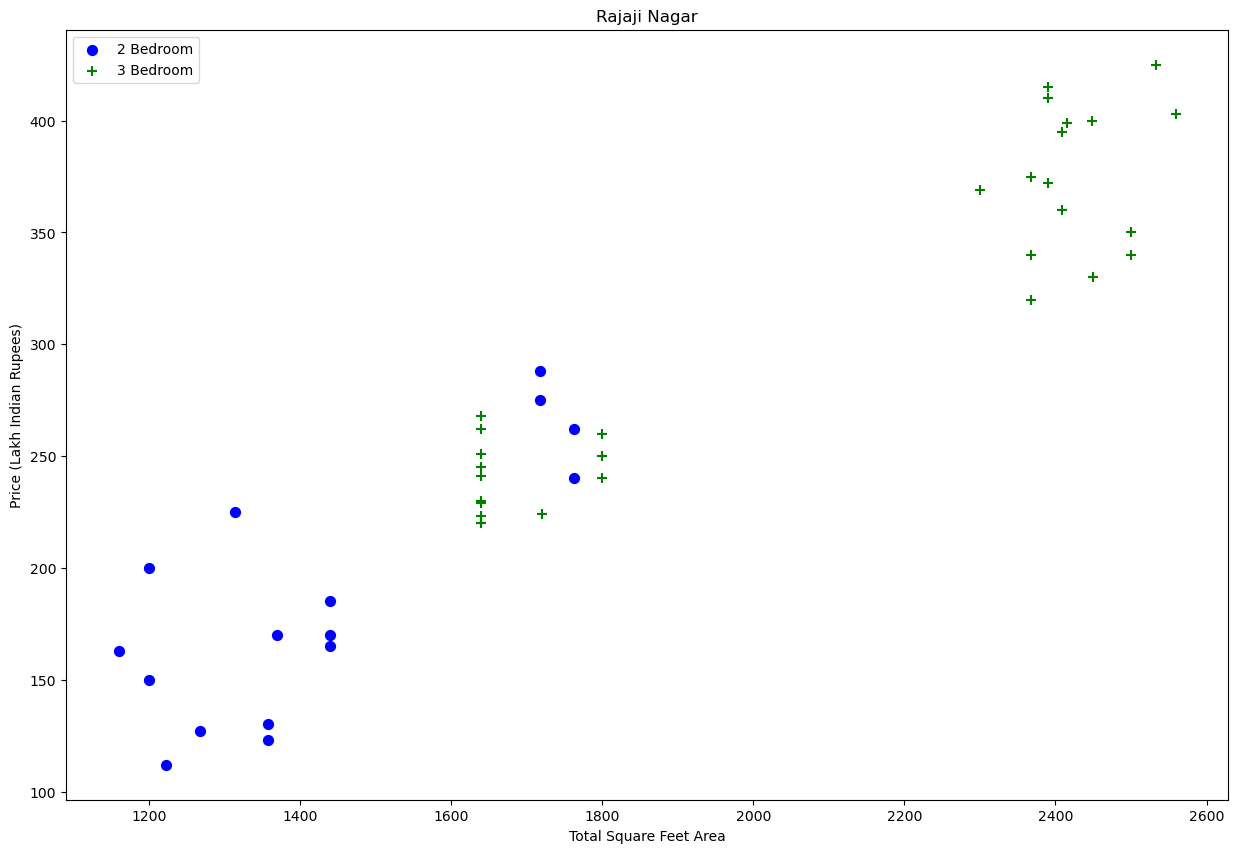

In [51]:
plot_scatter_chart(data8,"Rajaji Nagar")

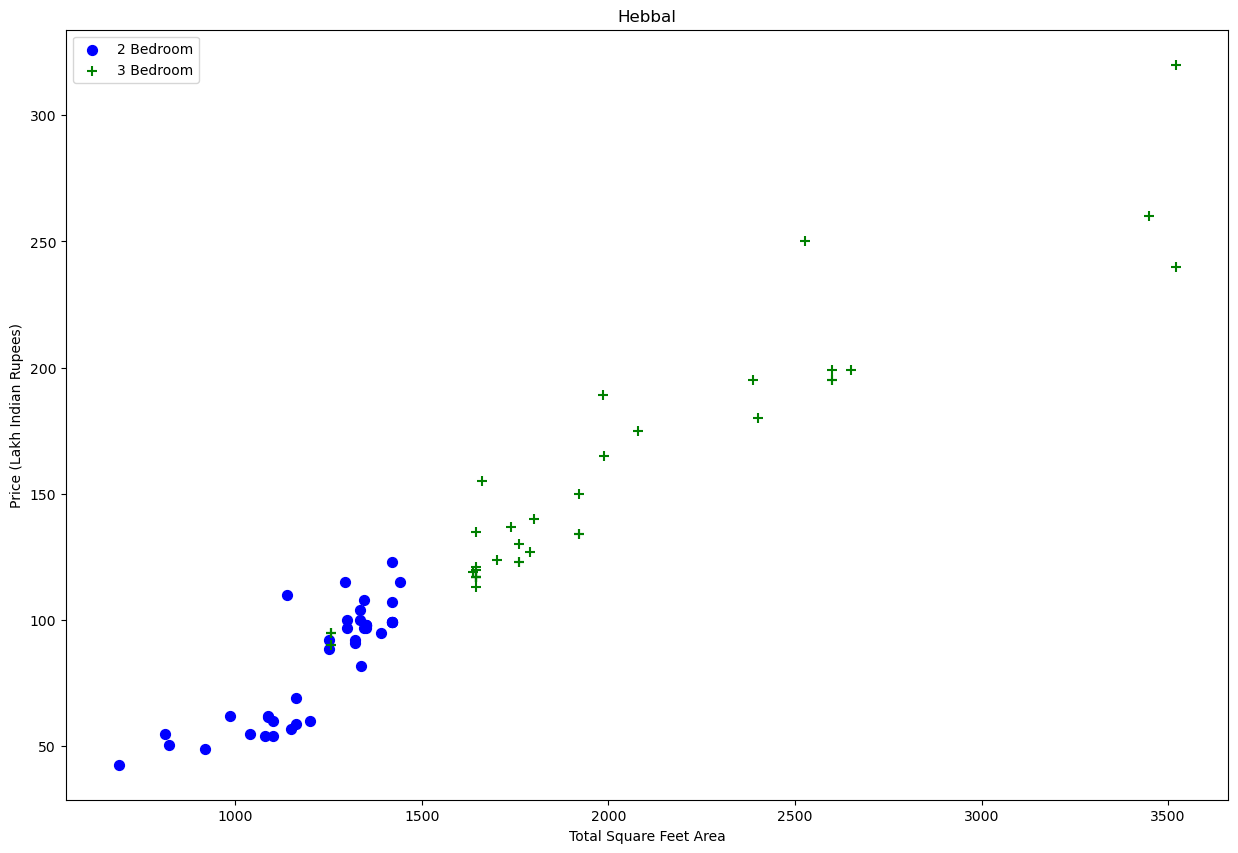

In [52]:
plot_scatter_chart(data8,"Hebbal")

Text(0, 0.5, 'Count')

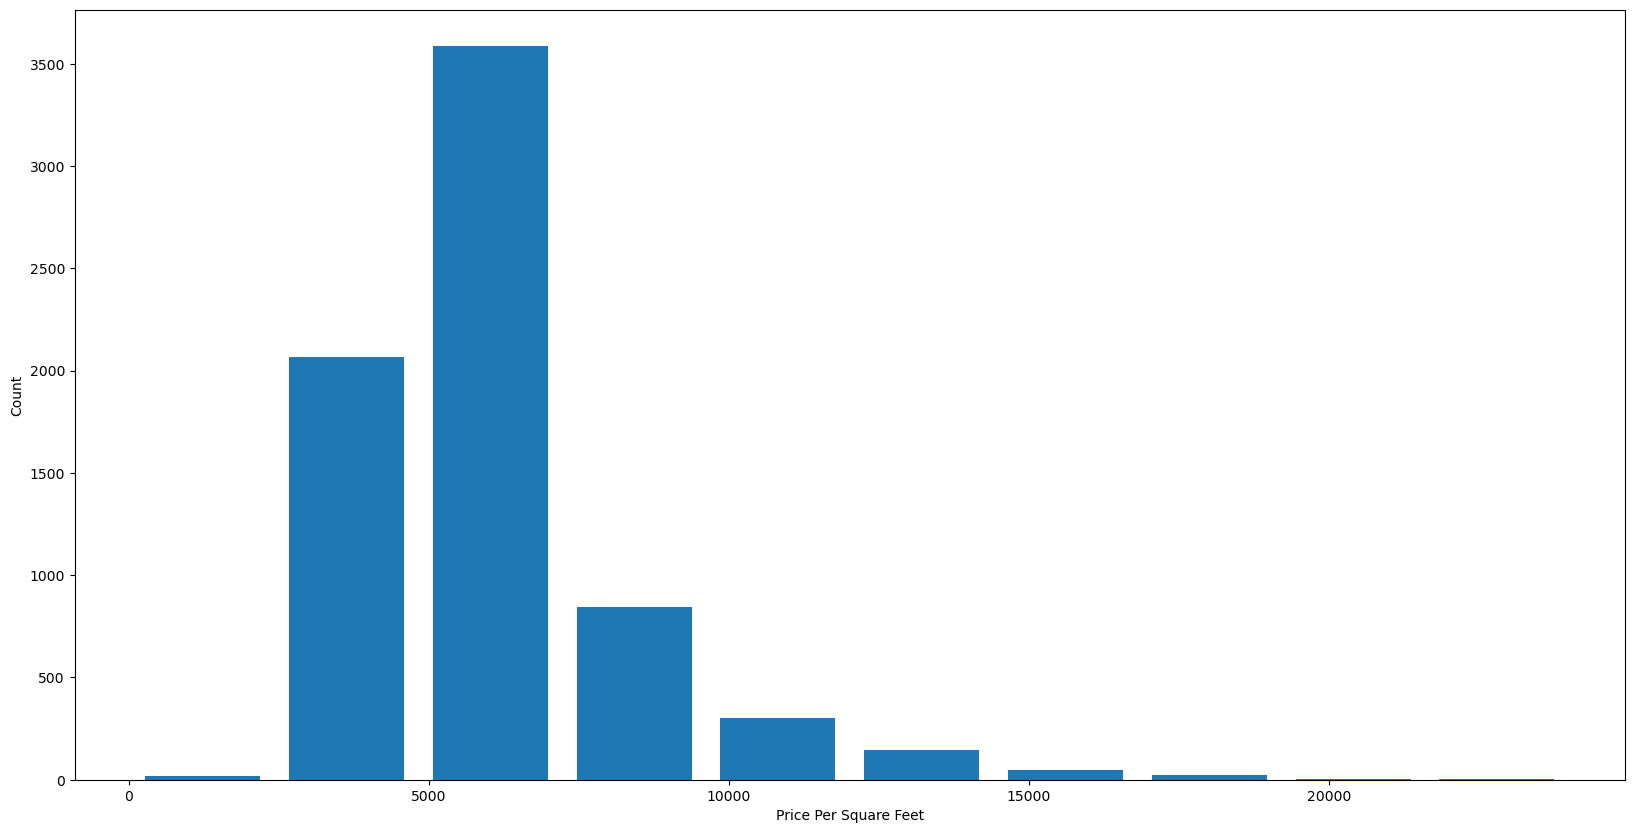

In [53]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Outlier Removal Using Bathrooms Feature

In [54]:
data8['bath'].unique()

array([ 4.,  3.,  2.,  1.,  8.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

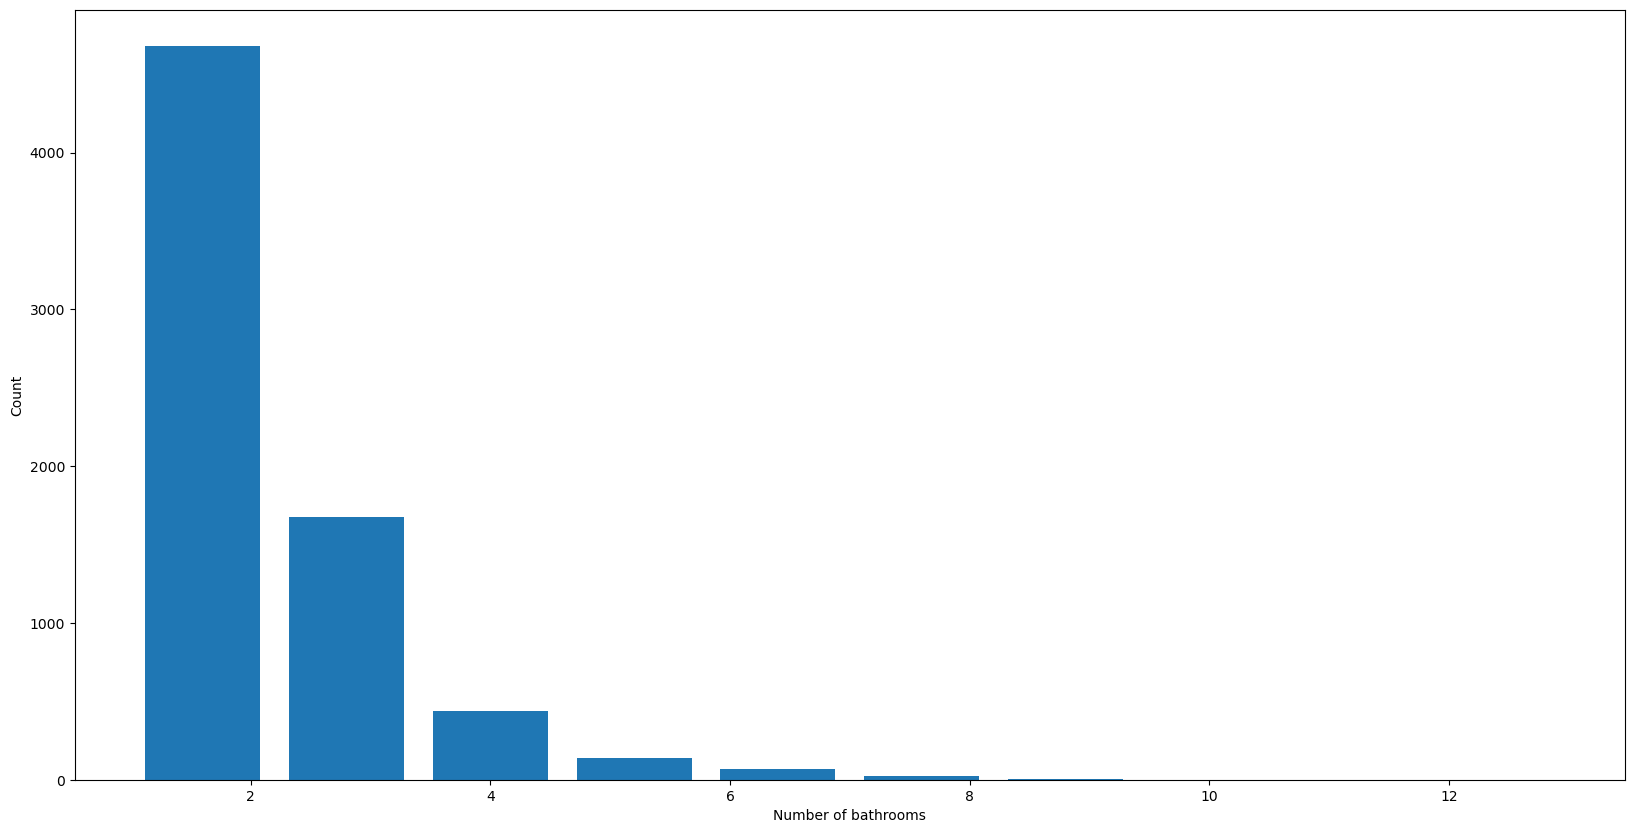

In [55]:
plt.hist(data8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [56]:
data8[data8['bath']>10]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom,price_per_sqft
9291,Super built-up Area,Ready To Move,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


We will look for homes with two more bathrooms than the number of bedrooms.

In [57]:
data8[data8['bath']>data8['bedroom']+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom,price_per_sqft
1546,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6468,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8108,Super built-up Area,Ready To Move,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [58]:
data9 = data8[data8['bath']<data8['bedroom']+2]
data9.shape

(6964, 10)

## Outlier Removal Using total_sqft Feature

In [59]:
data9['total_sqft'].describe()

count      6964.000000
mean       1531.118393
std        7849.174970
min         300.000000
25%        1082.000000
50%        1247.000000
75%        1630.000000
max      653400.000000
Name: total_sqft, dtype: float64

<Axes: >

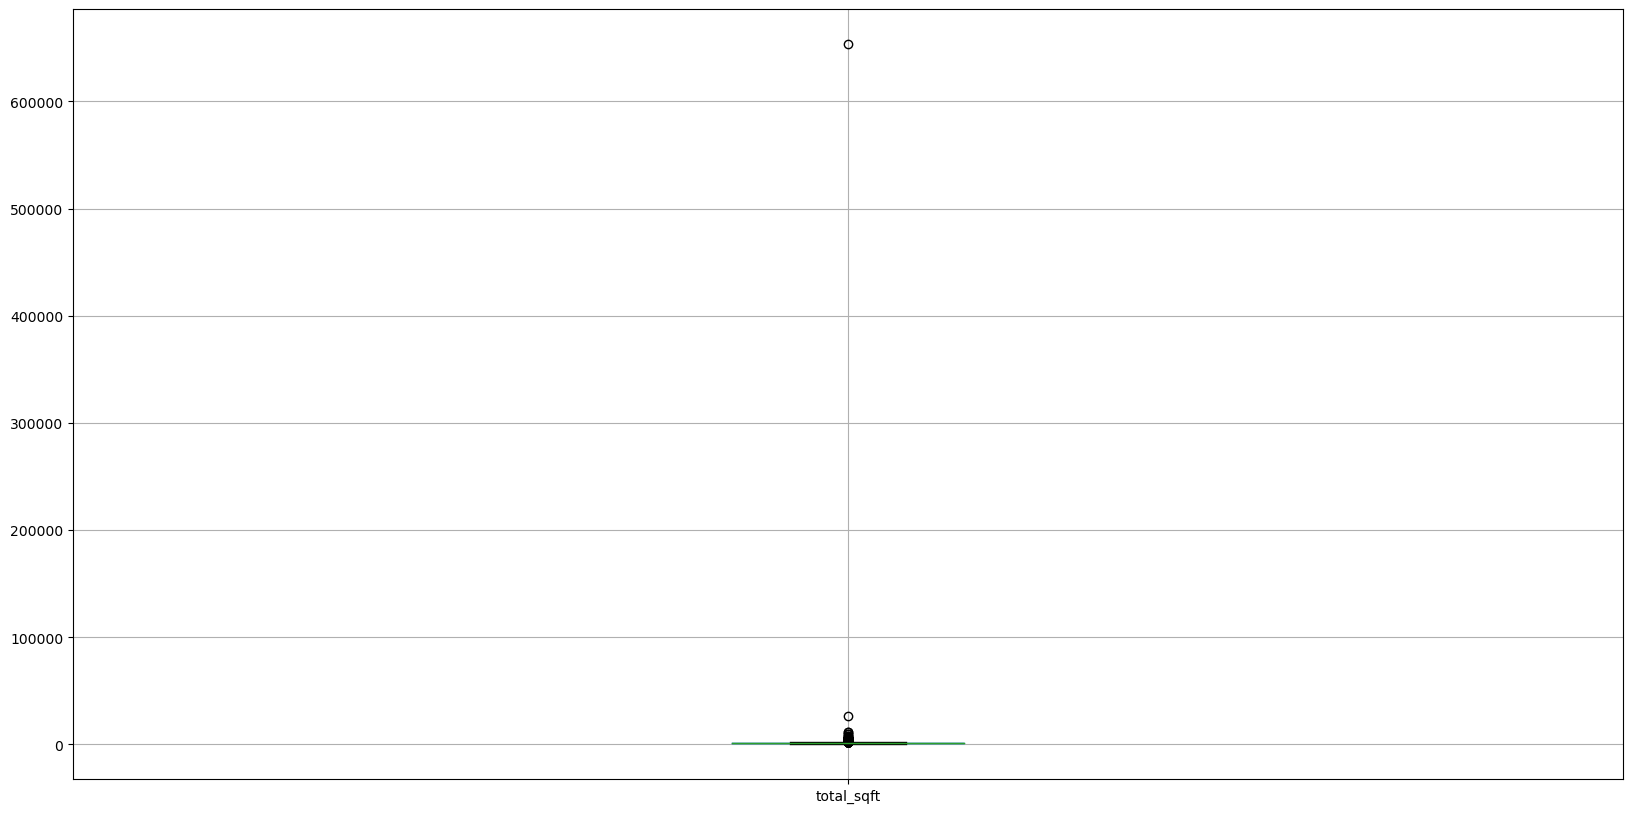

In [60]:
data9.boxplot(column='total_sqft')

In [62]:
data9[data9['total_sqft']>30000]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom,price_per_sqft
1290,Plot Area,Ready To Move,Bommenahalli,3 Bedroom,653400.0,3.0,1.0,217.0,3,33.210897


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 3 bedroom home has a total sqft of 653400. beccause for a 3 bedroom its too large. Anything above 3 standard deviation is an extreme outlier or a data error and can be removed

In [63]:
def remove_outliers(data, column_name, threshold=3):
    z_scores = (data[column_name] - data[column_name].mean()) / data[column_name].std()

    outliers = data[abs(z_scores) > threshold]

    df_no_outliers = data[abs(z_scores) <= threshold]

    return df_no_outliers

In [64]:
data10 = remove_outliers(data9,'total_sqft')

In the dataset it seems that some of the values in the total_sqft column are different, so will use the is_float function to display the values that are in ranges and values with different measuring units

In [65]:
data10.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Super built-up Area,May,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,Jun,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,Dec,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,Jun,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


lets see if there are any outliers for the balcony

<Axes: >

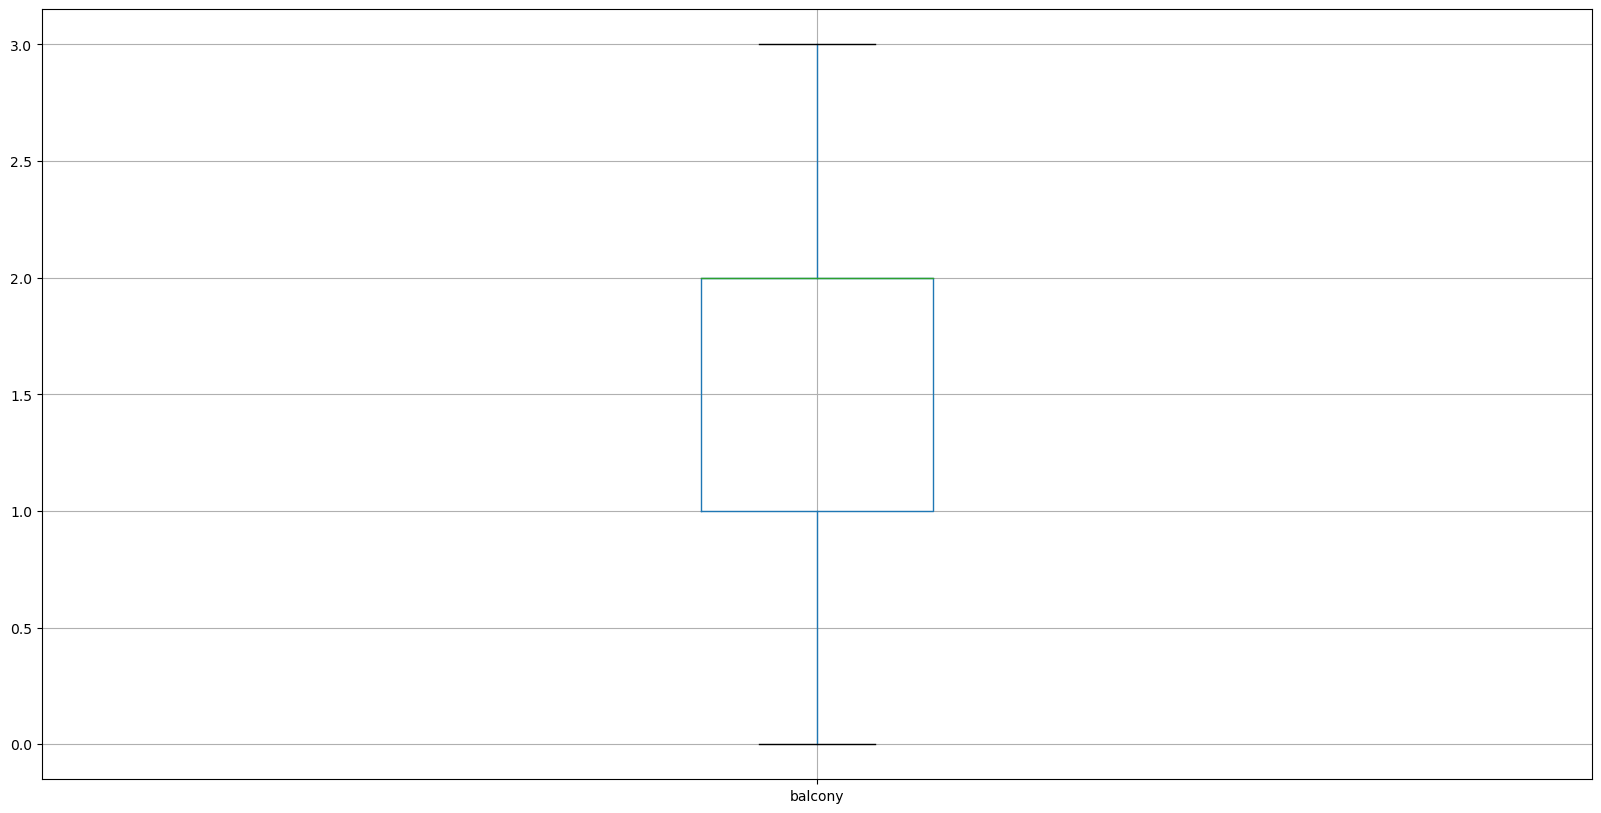

In [66]:
data10.boxplot(column='balcony')

From the barplot below we can observe the distributions among the area_type. It can be seen that the most of the apartments are Super Built-Up and least being Carpet Area

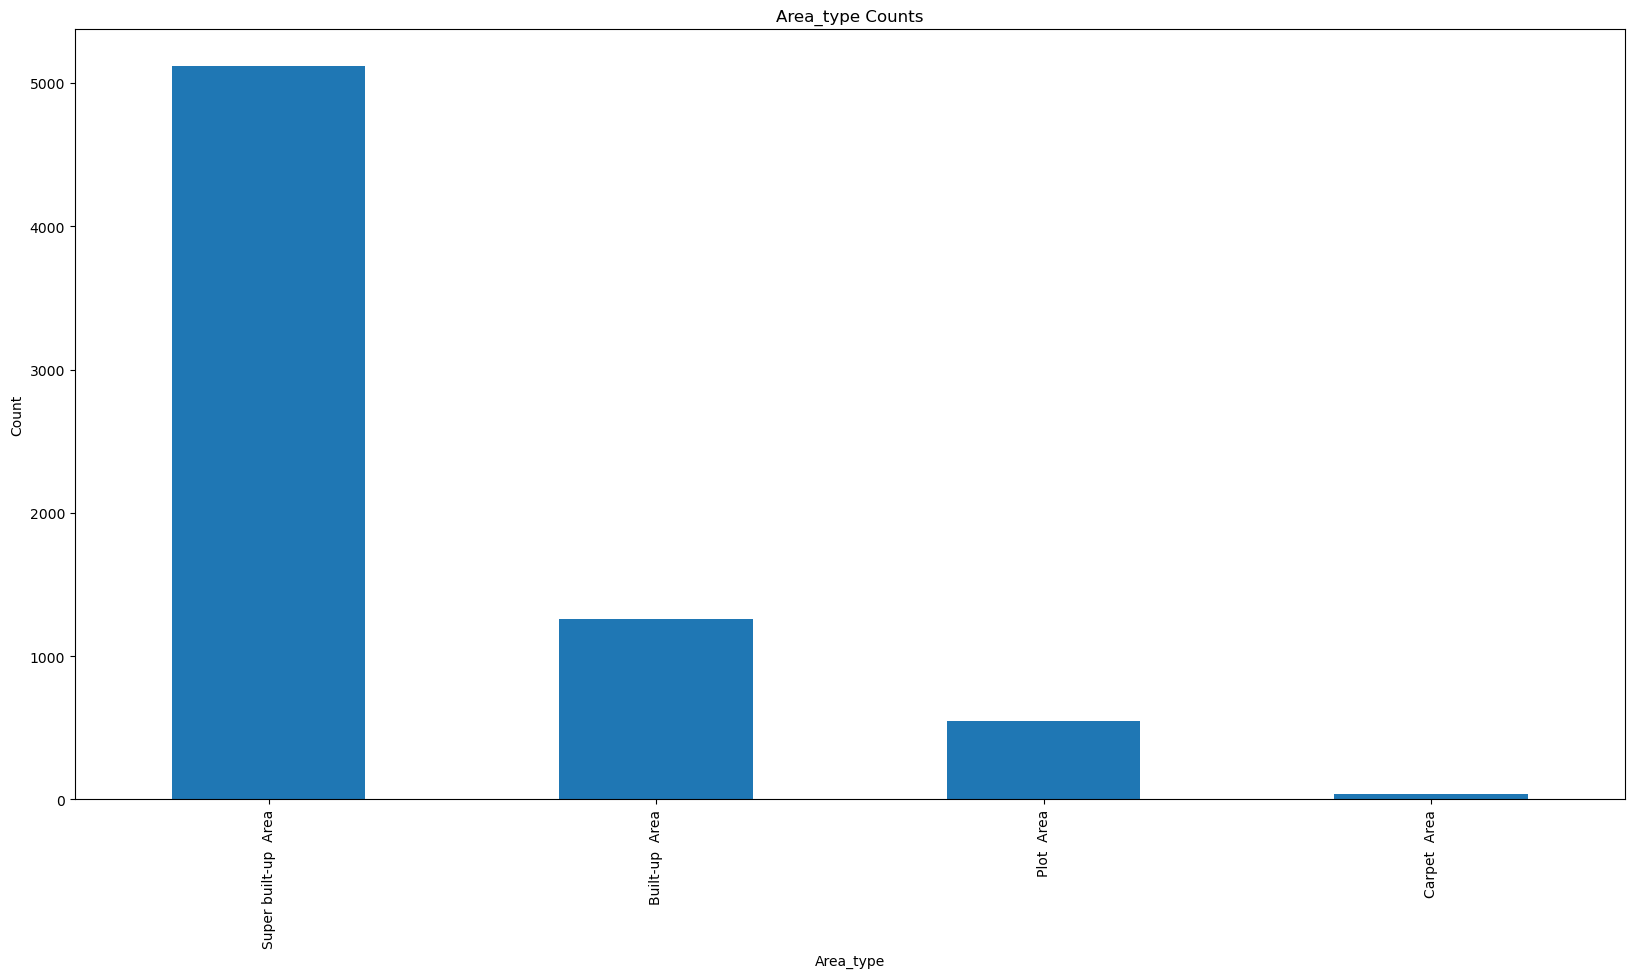

In [67]:
areaType_counts = data9['area_type'].value_counts()

ax = areaType_counts.plot(kind='bar', rot=90)
ax.set_xlabel('Area_type')
ax.set_ylabel('Count')
ax.set_title('Area_type Counts')

plt.show()

## Apartment availability in each month
After acquiring the availability information by month, it is evident that over 9000 apartments are marked as "Ready To Move.December has the highest availability, whereas February has the least availability.

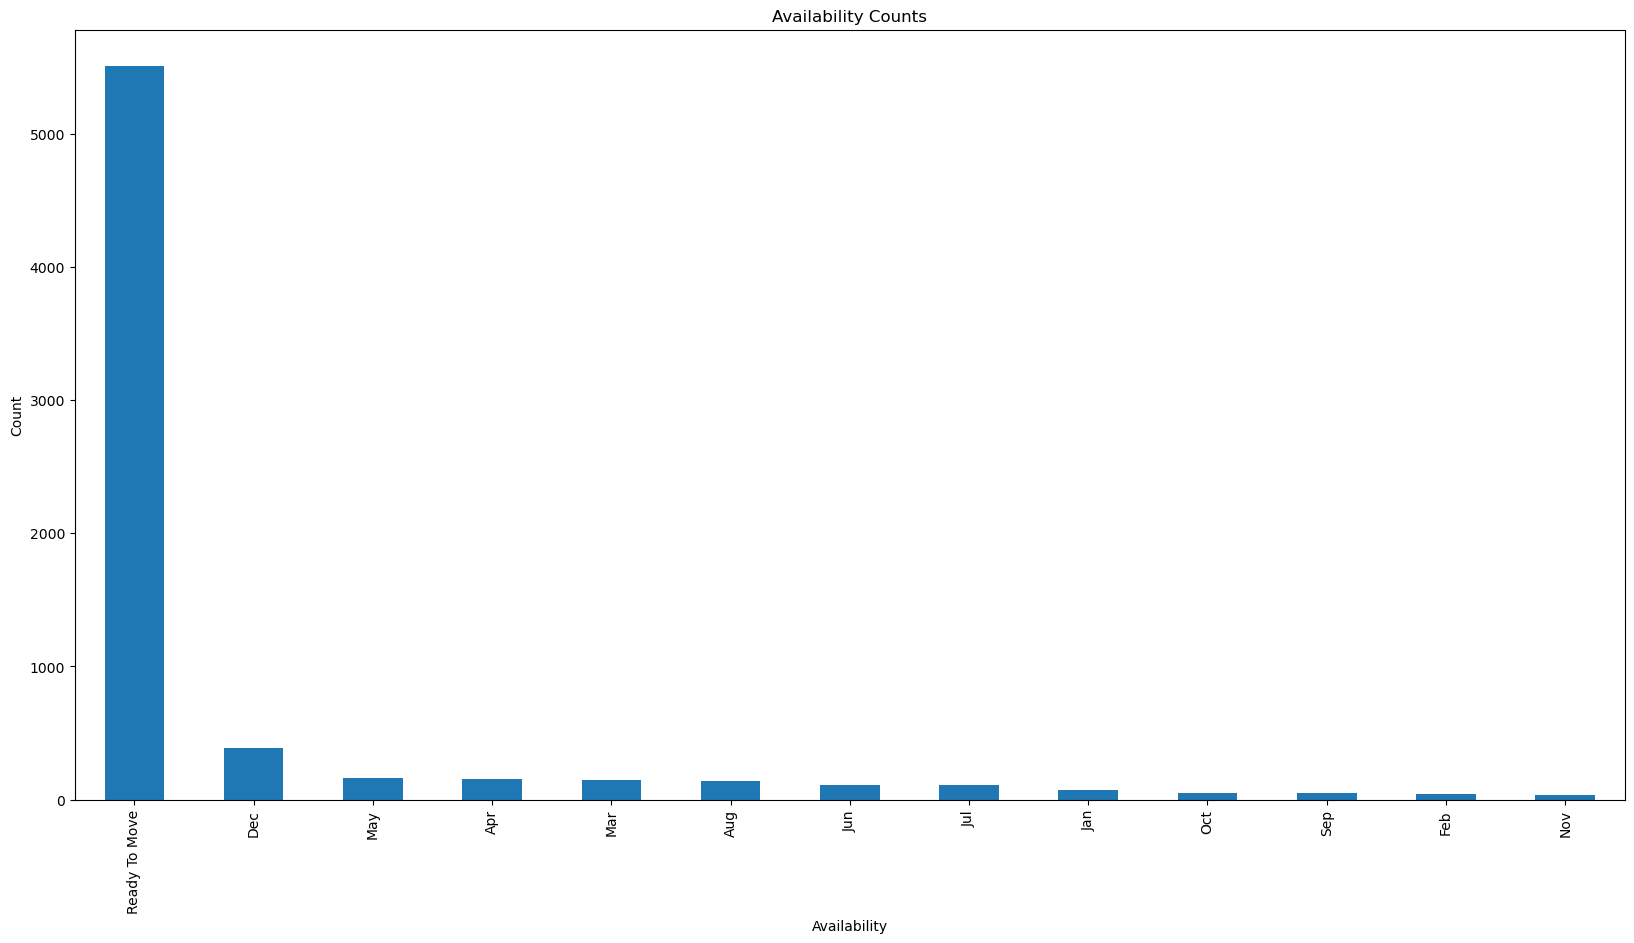

In [68]:
availability_counts = data10['availability'].value_counts()

ax = availability_counts.plot(kind='bar', rot=90)
ax.set_xlabel('Availability')
ax.set_ylabel('Count')
ax.set_title('Availability Counts')

plt.show()

## Use One Hot Encoding For Location

In [69]:
data11 = data10.copy()
data11.head(3)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Super built-up Area,May,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,Jun,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333


In [70]:
dummies = pd.get_dummies(data11['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data12 = pd.concat([data11,dummies.drop('other',axis='columns')],axis='columns')
data12.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedroom,price_per_sqft,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,May,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Jun,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,Dec,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Jun,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668,...,0,0,0,0,0,0,0,0,0,0


we now prepare the data to create a machine learning model for prediction of the house pricing

In [72]:
data13 = data12.drop(['area_type','availability','price_per_sqft','size', 'location'],axis=1)
data13.head(2)

,total_sqft,bath,balcony,price,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data13.shape

(6962, 241)

## Model Building

In [74]:
X = data13.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,balcony,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X.shape

(6962, 240)

In [76]:
y = data13.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [77]:
len(y)

6962

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [79]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8643101310195358

In [80]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test,y_test)

0.7488094058361963

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test,y_test)

0.7903008235714728

### Using K Fold cross validation to measure accuracy of our LinearRegression model

In [82]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=6, test_size=0.3, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80517598, 0.86374069, 0.84621748, 0.85914913, 0.8591551 ,
       0.85078552])

We can see that in 5 iterations we get a score an average of 85% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

### Find best model using GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1],
                'solver': ['auto']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [84]:
find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.844919,{}
1,lasso,0.694759,"{'alpha': 1, 'selection': 'cyclic'}"
2,ridge,0.843648,"{'alpha': 1, 'solver': 'auto'}"
3,decision_tree,0.642414,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Based on above results we can say that linear regression gives the best score. Hence we will use that.

In [85]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bedroom', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=240)

Test the model for few properties

In [86]:
def predict_price(location,sqft,bath,bedroom,balcony):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedroom
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index]= 1
        
    return lr_clf.predict([x])[0]

In [87]:
predict_price('1st Phase JP Nagar',1000, 3, 3,0)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.85777803147386

In [88]:
predict_price('1st Phase JP Nagar',1000, 3, 3, 2)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.62413240980902

In [89]:
predict_price('Indira Nagar',1000, 2, 2,1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


185.81745526525435

In [90]:
predict_price('Indira Nagar',1000, 2, 2,5)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.35016402192468